In [1]:
!pip install python-dotenv


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install roboflow
import os
from roboflow import Roboflow
from dotenv import load_dotenv

load_dotenv()

API_KEY = os.getenv("API_KEY")
WORKSPACE_NAME = os.getenv("WORKSPACE_NAME")
PROJECT_NAME = os.getenv("PROJECT_NAME")

rf = Roboflow(api_key=API_KEY)
project = rf.workspace(WORKSPACE_NAME).project(PROJECT_NAME)
version = project.version(1)
dataset = version.download("yolov11")


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
    --------------------------------------- 0.5/38.8 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.5/38.8 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.8/38.8 MB 699.0 kB/s eta 0:00:55
    --------------------------------------- 0.8/38.8 MB 699.0 kB/s eta 0:00:55
    --------------------------------------- 0.8/38.8 MB 699.0 kB/s eta 0:00:55
    --------------------------------------- 0.8/38.8 MB 699.0 kB/s eta 0:00:55
    --------------------------------------- 0.8/38.8 MB 699.0 kB/s eta 0:00:55
    --------------------------------------- 0.8/38.8 MB 699.0 kB/s eta 0:00:55
    --------------------------------------- 0.8/38.8 MB 699.0 kB/s eta 0:00:55
   - -------------------------------------- 1.0/38.8 MB 367.3 kB/s eta 0:01:43
   -

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.3.0 which is incompatible.
streamlit-extras 0.4.7 requires protobuf!=3.20.2, but you have protobuf 3.20.2 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
tensorflow-intel 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Venom-1 in yolov11:: 100%|██████████| 8128/8128 [00:08<00:00, 965.32it/s] 


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11m.pt")
#26 million para
result=model.train(
    data="/content/Venom-1/data.yaml",     # dataset config (classes, train/val paths)
    epochs=50,            # number of epochs
    imgsz=640,            # image size (typical for traffic datasets)
    batch=16,             # adjust depending on GPU memory (try 16 for T4, 32+ for A100)
    workers=2,            # dataloader workers (Colab often limited)
    optimizer="SGD",      # SGD or AdamW, SGD is default and stable
    device=0,             # which GPU to use (0 = first GPU)
    project="runs/train", # output dir
    name="yolov11m-traffic", # experiment name
    pretrained=True,      # start from COCO-pretrained weights
    amp=True
)


Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Venom-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11m-traffic2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

In [ ]:
from ultralytics import YOLO


model = YOLO("/content/runs/train/yolov11m-traffic2/weights/best.pt")


metrics = model.val()


print(metrics)


Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,039,284 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1582.3±659.6 MB/s, size: 44.1 KB)
val: Scanning /content/Venom-1/valid/labels.cache... 966 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 966/966 1.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 61/61 2.4it/s 26.0s
                   all        966      13450      0.504      0.605      0.475      0.349
               big bus        210        273      0.801      0.432      0.719      0.546
             big truck        404       1162      0.813      0.501       0.67      0.444
                bus-l-          8          8     0.0512      0.875     0.0511     0.0272
                bus-s-         12         12      0.209      0.833      0.547      0.485
                   car        927       8537

In [ ]:

results = model.predict(
    source="/content/test_images",  # folder with images
    save=True,                      # save results to 'runs/predict'
    conf=0.25                       # confidence threshold
)



image 1/458 /content/Venom-1/test/images/adit_mp4-1002_jpg.rf.ac5712cf064d8c8be58a148d43615506.jpg: 480x640 2 big trucks, 5 cars, 2 truck-m-s, 53.8ms
image 2/458 /content/Venom-1/test/images/adit_mp4-1008_jpg.rf.c93d3eb63d80fa713a012daed1f609b9.jpg: 480x640 2 big trucks, 11 cars, 1 truck-m-, 29.8ms
image 3/458 /content/Venom-1/test/images/adit_mp4-1022_jpg.rf.301035a7525d69e251dcf8ea31183522.jpg: 480x640 1 big truck, 8 cars, 1 truck-m-, 29.3ms
image 4/458 /content/Venom-1/test/images/adit_mp4-1028_jpg.rf.def4c3229fa1f63908038f3f3bfad49c.jpg: 480x640 13 cars, 1 small truck, 1 truck-m-, 22.4ms
image 5/458 /content/Venom-1/test/images/adit_mp4-1035_jpg.rf.7dc0d297581f9e11843d978686eff297.jpg: 480x640 2 big trucks, 11 cars, 1 small truck, 1 truck-m-, 22.4ms
image 6/458 /content/Venom-1/test/images/adit_mp4-1049_jpg.rf.bed29a50249817ddf7b9e40025e55b25.jpg: 480x640 3 big trucks, 8 cars, 1 small truck, 1 truck-m-, 1 truck-s-, 22.4ms
image 7/458 /content/Venom-1/test/images/adit_mp4-1055_jpg.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/adit_mp4-5_jpg.rf.9d99b4cadf12c9867d605a195cce0fa5.jpg: 480x640 2 bus-l-s, 15 cars, 3 truck-l-s, 145.2ms
Speed: 8.2ms preprocess, 145.2ms inference, 429.4ms postprocess per image at shape (1, 3, 480, 640)


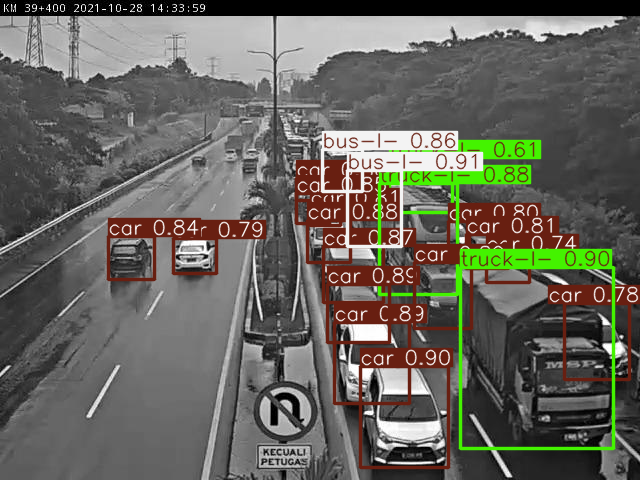

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
from PIL import Image
import numpy as np
from IPython.display import display


model = YOLO("/content/best.pt")


img_path = "/content/adit_mp4-5_jpg.rf.9d99b4cadf12c9867d605a195cce0fa5.jpg"


results = model.predict(source=img_path, conf=0.25, save=False, show=False)


annotated = results[0].plot()


display(Image.fromarray(annotated.astype(np.uint8)))
